# Import Libraries


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier


# Load Data


In [2]:
X, y = load_digits(return_X_y=True)
X = np.array(X)
y = np.array(y)
df = pd.concat(
    [
        # pd.DataFrame(X, columns=[f"feat_{i}" for i in range(X.shape[1])]),  # alt 1
        pd.DataFrame(X, columns=map(lambda x: f"feat_{x}", range(X.shape[1]))),  # alt 2
        pd.Series(y, name="target"),
    ],
    axis=1,
)

In [3]:
df.shape

(1797, 65)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   1797 non-null   float64
 1   feat_1   1797 non-null   float64
 2   feat_2   1797 non-null   float64
 3   feat_3   1797 non-null   float64
 4   feat_4   1797 non-null   float64
 5   feat_5   1797 non-null   float64
 6   feat_6   1797 non-null   float64
 7   feat_7   1797 non-null   float64
 8   feat_8   1797 non-null   float64
 9   feat_9   1797 non-null   float64
 10  feat_10  1797 non-null   float64
 11  feat_11  1797 non-null   float64
 12  feat_12  1797 non-null   float64
 13  feat_13  1797 non-null   float64
 14  feat_14  1797 non-null   float64
 15  feat_15  1797 non-null   float64
 16  feat_16  1797 non-null   float64
 17  feat_17  1797 non-null   float64
 18  feat_18  1797 non-null   float64
 19  feat_19  1797 non-null   float64
 20  feat_20  1797 non-null   float64
 21  feat_21  1797 

In [5]:
df.describe()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [6]:
df.isna().any().any()

np.False_

# Data Understanding


In [7]:
print(df.shape)

(1797, 65)


In [8]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [9]:
df.iloc[:2]

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


# EDA


<Figure size 640x480 with 0 Axes>

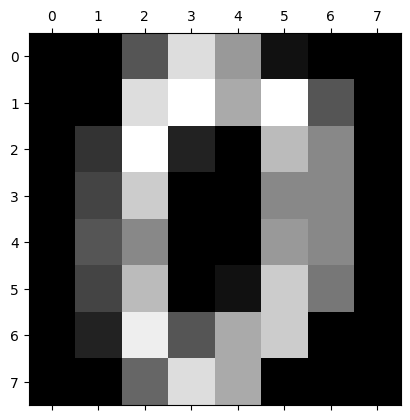

In [10]:
plt.gray()
plt.matshow(df.iloc[0, :-1].to_numpy().reshape(8, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

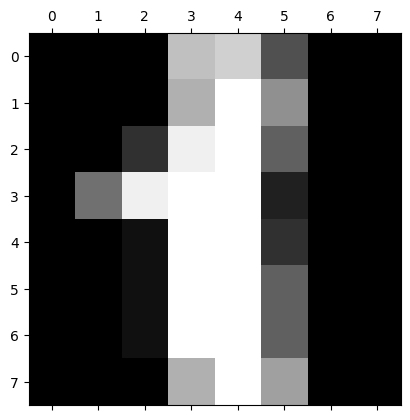

In [11]:
plt.gray()
plt.matshow(X[1].reshape(8, 8))
plt.show()

# Feature Engineering


## Train Test Split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling


In [14]:
X_train[0]

array([[ 0.,  0.,  0.,  9., 15.,  2.,  0.,  0.,  0.,  0.,  5., 16., 11.,
         1.,  0.,  0.,  0.,  0., 13., 15.,  1.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  2., 16., 11.,  4.,  4.,  0.,
         0.,  0.,  2., 15., 16., 16., 14., 10.,  1.,  0.,  0.,  9., 16.,
         7.,  3., 15.,  6.,  0.,  0.,  0.,  7., 15., 16., 16.,  6.],
       [ 0.,  3., 12., 12., 14.,  4.,  0.,  0.,  0.,  1., 13.,  4.,  4.,
         0.,  0.,  0.,  0.,  4., 14.,  4.,  3.,  0.,  0.,  0.,  0.,  5.,
        13., 12., 14., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  8.,  0.,  0.,  0.,  6.,  2.,
         0.,  8.,  8.,  0.,  0.,  2., 13., 16., 16., 16.,  2.,  0.]])

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [17]:
X_train[0]

array([ 0.        , -0.33790435, -1.09141592, -0.64913206,  0.73480922,
       -0.6782652 , -0.40764783, -0.12238102, -0.05576317, -0.62606288,
       -0.99058772,  0.99749054,  0.13213489, -1.19579353, -0.51556231,
       -0.12605859, -0.03733267, -0.72296123,  0.55610538,  1.38118964,
       -0.98465664, -1.26284019, -0.55465252, -0.11565628, -0.02638899,
       -0.15208278,  1.10759523,  0.37163491, -1.60830723, -1.28974179,
       -0.63555933, -0.04573894,  0.        , -0.10276083,  1.32734049,
        0.31000002, -1.05452978, -0.80512633, -0.83498919,  0.        ,
       -0.05806465,  0.13008703,  1.23225418,  1.35913603,  1.32341669,
        1.01539823,  1.51779287,  3.19368333, -0.03963009, -0.40398151,
        0.25100815,  1.22276113, -0.47996928, -0.96182318,  2.3466476 ,
        6.15487177, -0.02638899, -0.30140625, -1.0865776 , -1.14418634,
        0.65337948,  1.58325794,  3.53125595,  3.30213343])

# Model Training


In [21]:
model = OneVsRestClassifier(
    LogisticRegression(solver="liblinear", C=0.05, random_state=1)
)
model

OneVsRestClassifier(estimator=LogisticRegression(C=0.05, random_state=1,
                                                 solver='liblinear'))

In [22]:
model.fit(X, y)

OneVsRestClassifier(estimator=LogisticRegression(C=0.05, random_state=1,
                                                 solver='liblinear'))

# Model Evaluation


In [26]:
y_pred_proba = model.predict_proba(X_train)
y_pred_proba[0]

array([0.10343232, 0.1685081 , 0.13387341, 0.03022338, 0.12595589,
       0.06326241, 0.19311524, 0.05697836, 0.10037338, 0.02427751])

In [27]:
y_train[0]

np.int64(6)

In [28]:
y_train_pred = model.predict(X_train)
print(y_train_pred[:10])

[6 5 3 4 4 4 8 8 7 0]


In [30]:
X_test = scaler.transform(X_test)
X_test[0]

array([ 0.        , -0.33790435,  1.20793253,  0.98286479,  0.73480922,
       -0.50179098, -0.40764783, -0.12238102, -0.05576317,  0.94510785,
        1.02540559, -0.01354378,  0.13213489,  0.78978795, -0.51556231,
       -0.12605859, -0.03733267,  0.11756894,  0.55610538, -1.03547179,
       -0.34076513,  1.15375429, -0.55465252, -0.11565628, -0.02638899,
       -0.79297122, -1.46107832, -1.49682344,  0.33750417,  0.59619239,
       -0.63555933, -0.04573894,  0.        , -0.67622614, -1.20929092,
       -1.2935638 ,  0.95745423, -0.29656961, -0.83498919,  0.        ,
       -0.05806465, -0.53634812, -1.06126442,  0.42895101,  1.16384715,
       -1.45829777, -0.79437542, -0.09615391, -0.03963009, -0.40398151,
        0.77963352,  1.22276113,  1.22771785,  0.36556209, -0.54080539,
       -0.197451  , -0.02638899, -0.30140625,  1.4462844 ,  0.21465314,
       -0.78477024,  1.07172193,  3.53125595,  4.46516425])

In [32]:
y_pred = model.predict(X_test)
y_pred[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [33]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
model.score(X_train, y_train)

0.9728601252609603

In [35]:
model.score(X_test, y_test)

0.9666666666666667

In [36]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  3,  1,  3,  0,  1,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 40]])

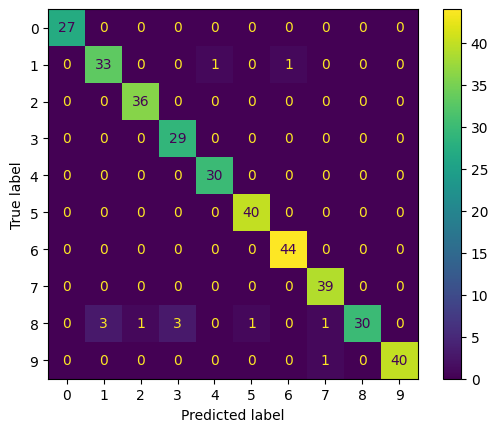

In [42]:
dist = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
dist.plot()
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.94      0.93        35
           2       0.97      1.00      0.99        36
           3       0.91      1.00      0.95        29
           4       0.97      1.00      0.98        30
           5       0.98      1.00      0.99        40
           6       0.98      1.00      0.99        44
           7       0.95      1.00      0.97        39
           8       1.00      0.77      0.87        39
           9       1.00      0.98      0.99        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Inferencing


In [59]:
X_inf = df.sample(5, random_state=1).drop("target", axis=1).to_numpy()
X_inf = scaler.transform(X_inf)
model.predict(X_inf)

array([1, 5, 0, 7, 1])

# Conclusion


Model sudah baik dengan tingkat akurasi 97%

##### Future improvement

- Collect more data
